# Linear regression in scikit-learn

These notes are either from or adapted from  <a href="https://www.davidinouye.com/course/ece20875-spring-2021/" target="_blank"> Python for Data Science (Spring 2021)</a>.


(Adapted from tutorial at https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In addition to providing `numpy` for matrix algebra, Python also has a library of machine learning models available in `scikit-learn`. In this tutorial, we will learn how to train, apply, and evaluate the linear regression model available in `scikit-learn`. We will also learn how to plot the resulting models using Python's standard plotting library, `matplotlib`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Import some real data

We will first import one of the datasets that is provided in `sklearn`. For a small example, we will only take 20 datapoints. Additionally, we will only use one of the feature columns available in the feature matrix, i.e., to study linear regression with a single explanatory variable $x$. We will also use the default functionality in `sklearn` for splitting the dataset into training and testing sets.

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:20,[2]]
y = y[:20]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train[:5,:]) # Show first five data points

(15, 1) (5, 1) (15,) (5,)
[[ 0.01211685]
 [-0.04716281]
 [-0.00189471]
 [-0.03638469]
 [ 0.04445121]]


## Fit linear regression model to data

Now we will define the linear regression model, and fit the model to the training dataset. After training, we can inspect the parameters of the trained model (i.e., the coefficient and the intercept).

In [3]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train,y_train)

LinearRegression()

In [14]:
print('Coefficients', regr.coef_)
print('Intercept', regr.intercept_)

Coefficients [443.58293519]
Intercept 151.3857211551049


## Predict y for test (new) data points

With the trained model in hand, we can apply the model to new datapoints, i.e., those in the testing set.

In [4]:
y_pred_test = regr.predict(X_test)
print(y_pred_test.shape)
print(y_pred_test)

(5,)
[146.72046963 128.55270598 143.37377633 178.75310553 114.20973469]


## Evaluating the model: MSE and $r^2$

To assess the quality of the model, we can look at the resulting mean squared error (MSE) and coefficient of determination ($r^2$) on the testing set. `sklearn` has built in functions for these metrics.

In [16]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred_test))

Mean squared error: 2169.59
Coefficient of determination: -1.24


Notice that our coefficient of determination is actually negative! This means that our model did a very poor job generalizing to the test set. There are a number of possible reasons for this, not the least of which is that we only used 20 datapoints in this small example. In the following, we visualize the result.

In [9]:
X_train

array([[ 0.01211685],
       [-0.04716281],
       [-0.00189471],
       [-0.03638469],
       [ 0.04445121],
       [-0.04069594],
       [-0.02560657],
       [ 0.03906215],
       [-0.00189471],
       [ 0.04229559],
       [ 0.01750591],
       [-0.01159501],
       [ 0.06169621],
       [-0.01806189],
       [-0.02884001]])

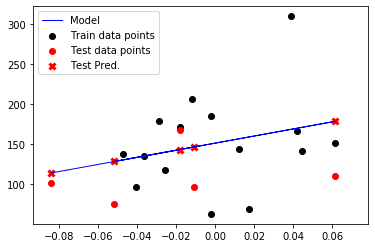

In [17]:
# Plot outputs

plt.scatter(X_train, y_train,  color='black', label='Train data points')
plt.scatter(X_test, y_test,  color='red', label='Test data points')
plt.plot(X_test, y_pred_test, color='blue', linewidth=1, label='Model')
plt.scatter(X_test, y_pred_test, marker='x', color='red', linewidth=3, label='Test Pred.')
plt.legend()
plt.show()

Looking at the difference between the red x's (predictions) and o's (actual datapoints), we can see that our predictions were pretty significantly off, which is why we have a bad $r^2$ score. A good result would have $r^2$ positive and close to $+1$.

In data science, it is very important to get used to negative results. In fact, negative results are sometimes the most interesting, as they rule out and/or falsify existing hypotheses.

## Model Normalization

In the above example, we did not normalize the data prior to training the model. Doing so is often desirable, especially for interpreting the difference in effect of model features. Below, we use `numpy` to apply our own normalization, and train the model on the normalized data.

In [18]:
mean_X = np.mean(X_train, axis=0)
std_X = np.std(X_train, axis=0)
mean_y = np.mean(y)
std_y = np.std(y)

X_train_norm = (X_train - mean_X) / std_X
y_train_norm = (y_train - mean_y) / std_y

Mean squared error: 13071.68


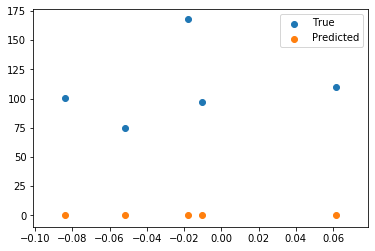

In [19]:
# Now train the model
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_norm, y_train_norm)

# Predict on the test dataset
y_pred_test = regr.predict(X_test)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred_test, label='Predicted')
plt.legend()

This result looks really bad (even worse than the one above!). Why? Because we did not normalize the testing dataset prior to inputting it to the model. Below, we normalize the testing input, and then unnormalize the resulting prediction output.

Mean squared error: 2169.59


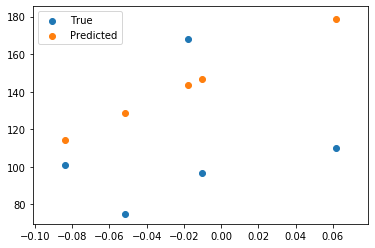

In [20]:
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_norm, y_train_norm)

# Normalize the input just like we did the training data!
X_test_norm = (X_test - mean_X)/std_X

y_pred_test_norm = regr.predict(X_test_norm)

# Unnormalize y after prediction!
y_pred_test = (y_pred_test_norm * std_y) + mean_y

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_test))
plt.scatter(X_test, y_test, label='True')
plt.scatter(X_test, y_pred_test, label='Predicted')
plt.legend()

These results look much better! When using normalization, it is important to handle it both before fitting and at test time.

Note also that while we wrote our own normalization functions here, `scikit-learn` has built in methods for handling it.

### Example:
Now, let's try different degrees of polynomial regression for the data given below, calculate the Mean Squared Error (MSE) for each degree, and plot the corresponding regression models

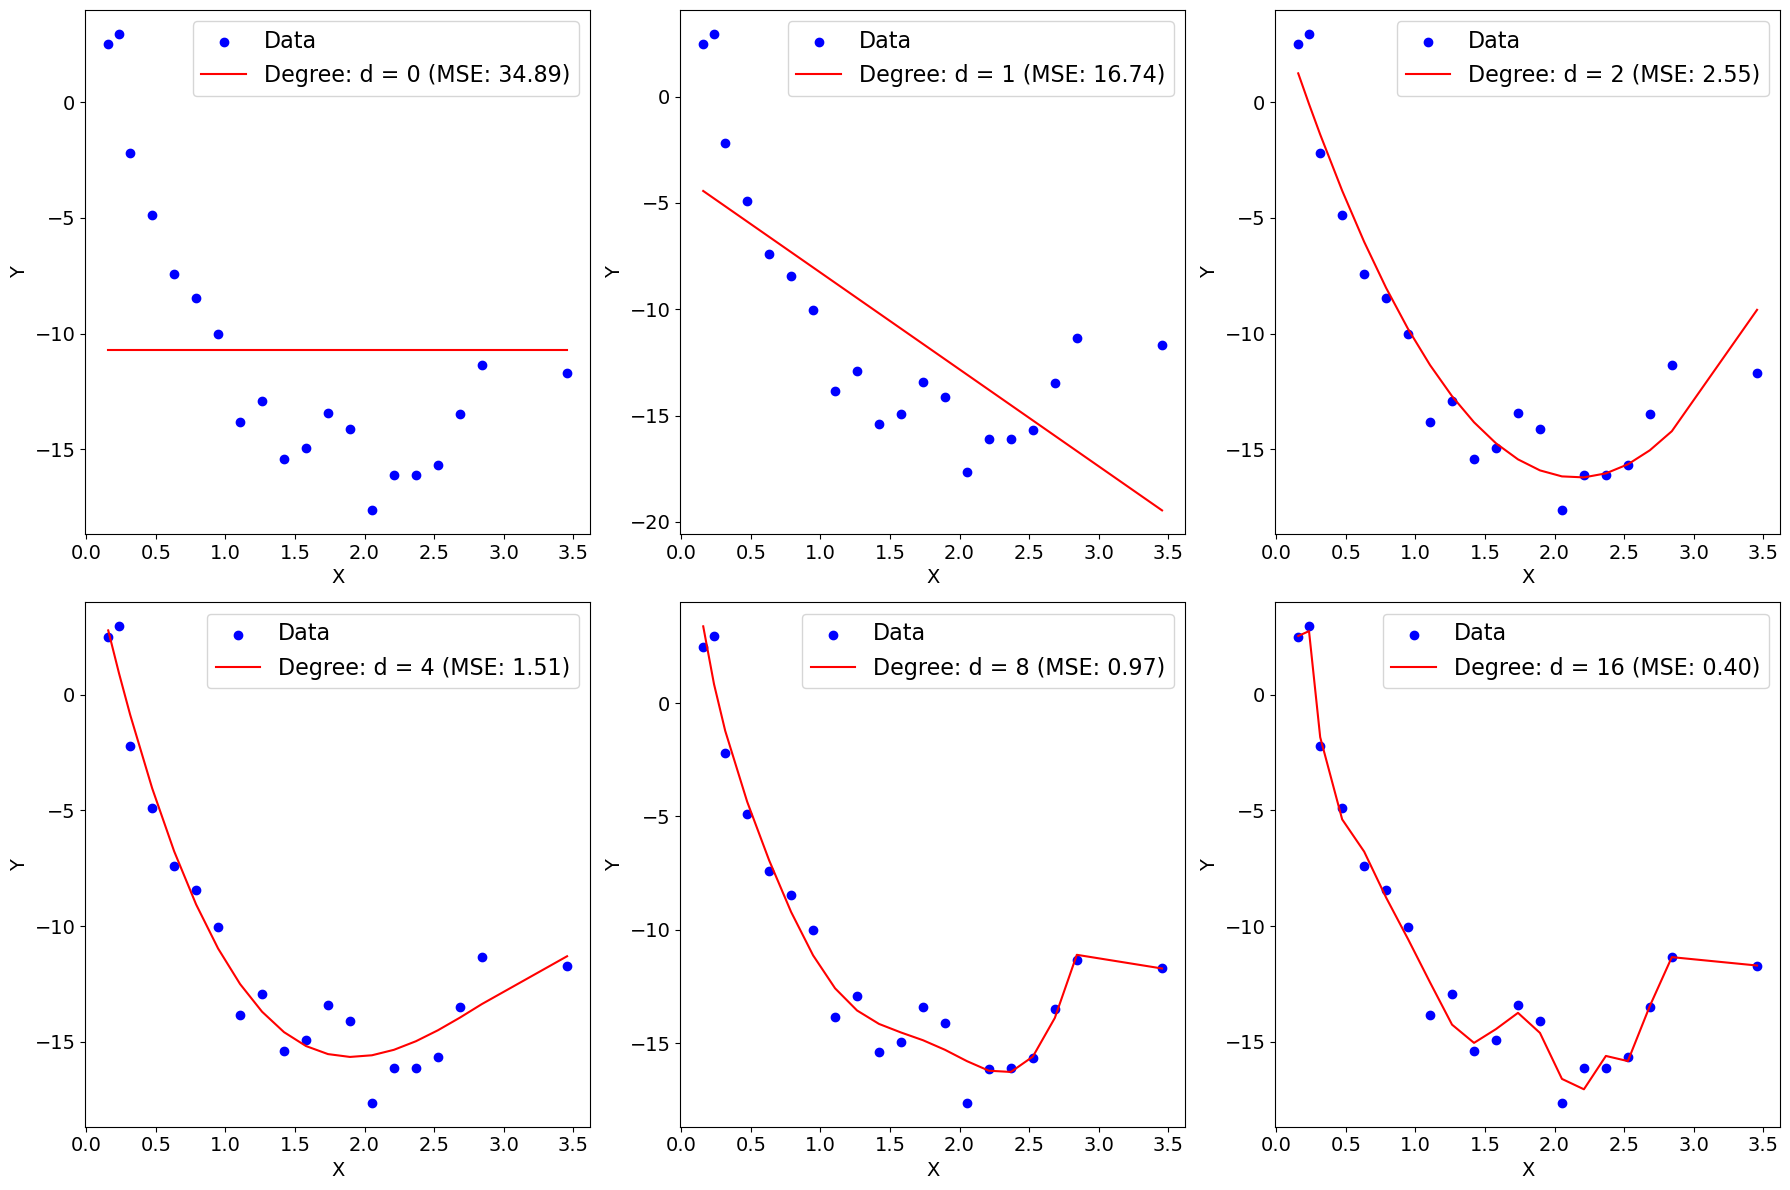

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate dataset
x_data = np.array([ 0.23547456, 0.15789474, 0.31578947, 0.47368421, 0.63157895, 
                   0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263, 
                   1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632, 
                   2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.45454545 ])
y_data = np.array([ 2.95258285, 2.49719803, -2.1984975, -4.88744346, -7.41326345, 
                   -8.44574157, -10.01878504, -13.83743553, -12.91548145, -15.41149046, 
                   -14.93516299, -13.42514157, -14.12110495, -17.6412464 , -16.1275509 , 
                   -16.11533771, -15.66076021, -13.48938865, -11.33918701, -11.70467566])

# Reshape data
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Degrees to try
degrees = [0, 1, 2, 4, 8, 16]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot data
for ax in axes:
    ax.scatter(x_data, y_data, color='blue', label='Data')
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Plot regression models for different degrees
for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x_data)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(x_poly, y_data)

    # Predict y values using the model
    y_pred = model.predict(x_poly)

    # Sort the values for plotting
    sorted_zip = sorted(zip(x_data, y_pred))
    x_data_sorted, y_pred_sorted = zip(*sorted_zip)

    # Calculate MSE
    mse = mean_squared_error(y_data, y_pred)

    # Plot regression curve
    axes[i].plot(x_data_sorted, y_pred_sorted, color='red', label=f'Degree: d = {degree} (MSE: {mse:.2f})')
    axes[i].legend(fontsize=16)
    #axes[i].set_title(f'Degree {degree} Regression', fontsize=16)
    axes[i].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()



In the code below, we use a polynomial of degree d=10 with different amounts of regularization.

C:\Users\Fatma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.56334e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Fatma\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.28502e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


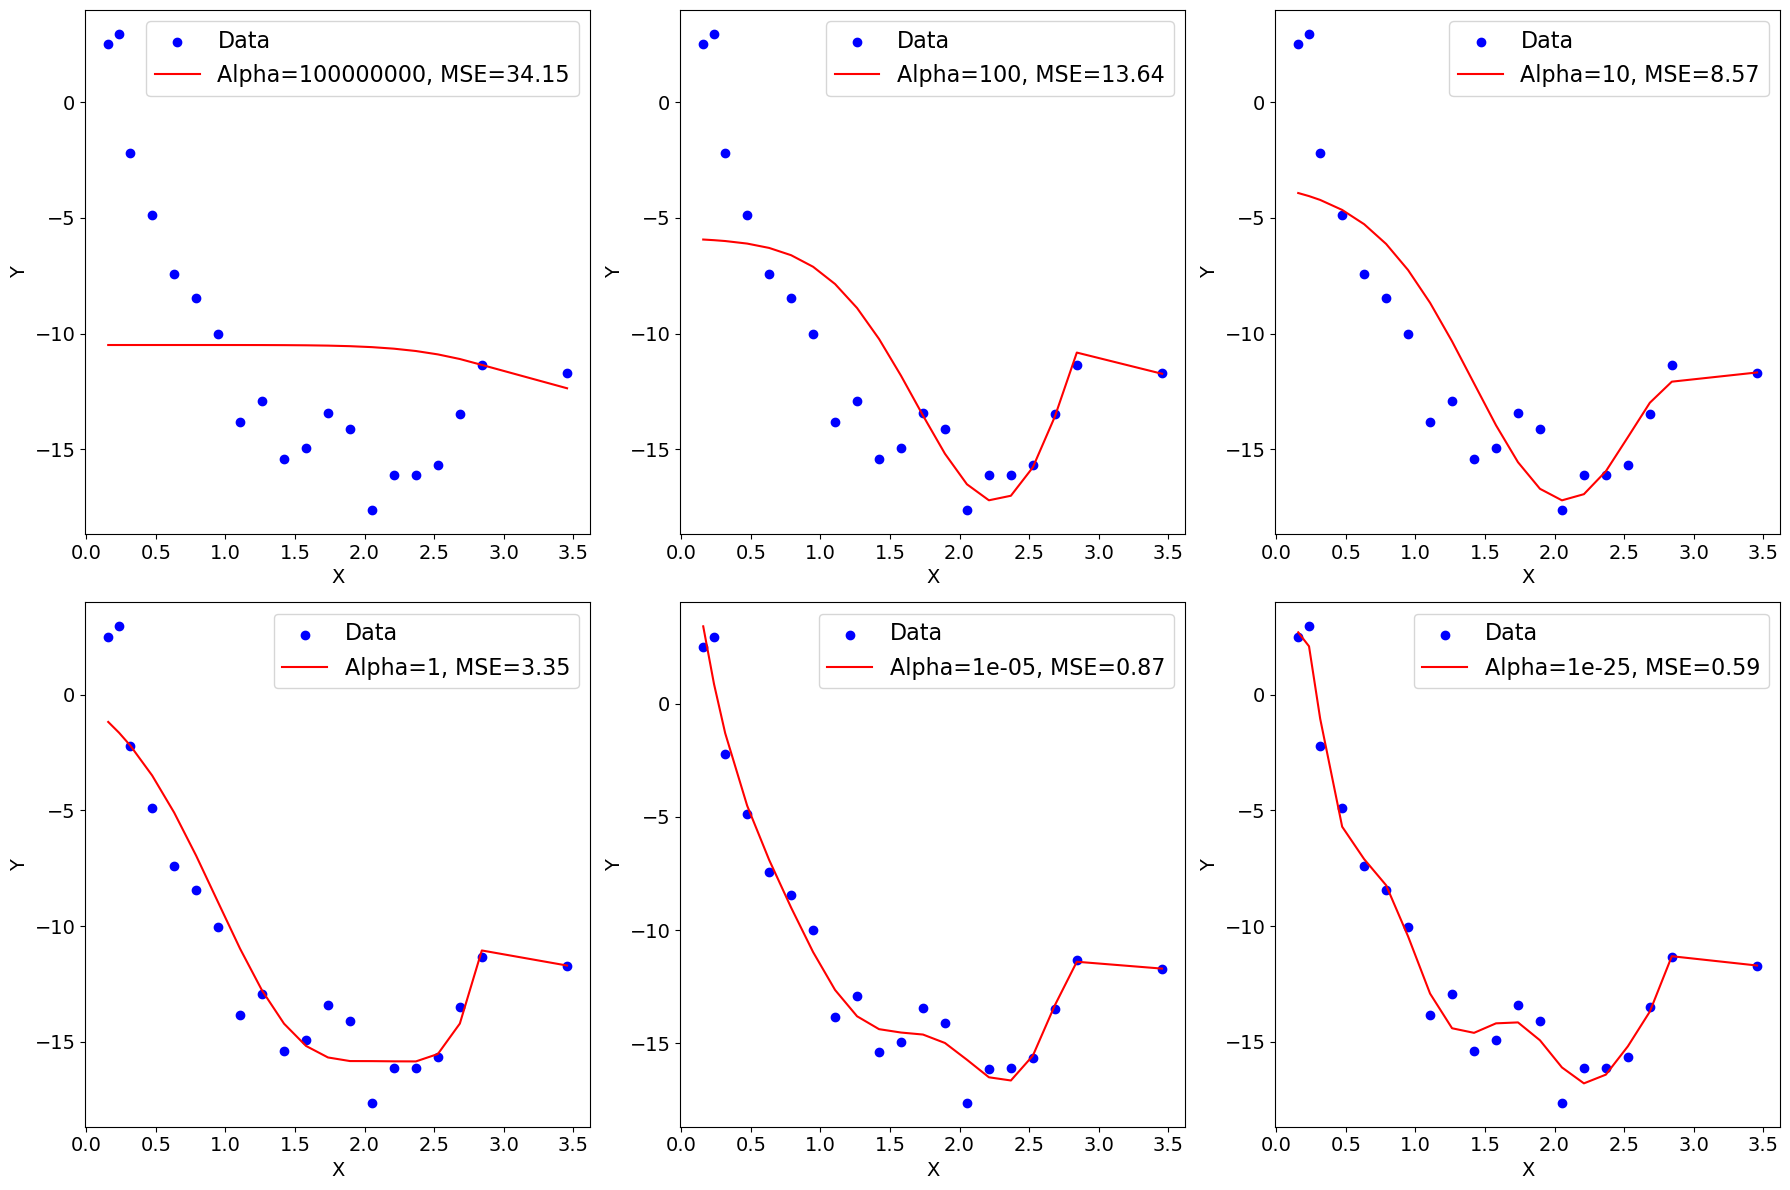

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate dataset
x_data = np.array([ 0.23547456, 0.15789474, 0.31578947, 0.47368421, 0.63157895, 
                   0.78947368, 0.94736842, 1.10526316, 1.26315789, 1.42105263, 
                   1.57894737, 1.73684211, 1.89473684, 2.05263158, 2.21052632, 
                   2.36842105, 2.52631579, 2.68421053, 2.84210526, 3.45454545 ])
y_data = np.array([ 2.95258285, 2.49719803, -2.1984975, -4.88744346, -7.41326345, 
                   -8.44574157, -10.01878504, -13.83743553, -12.91548145, -15.41149046, 
                   -14.93516299, -13.42514157, -14.12110495, -17.6412464 , -16.1275509 , 
                   -16.11533771, -15.66076021, -13.48938865, -11.33918701, -11.70467566])

# Reshape data
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)

# Degrees to try
degree = 10

# Regularization strengths
alphas = [100000000, 100, 10, 1, 1e-5, 1e-25]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot data
for ax in axes:
    ax.scatter(x_data, y_data, color='blue', label='Data')
    ax.set_xlabel('X', fontsize=14)
    ax.set_ylabel('Y', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

# Plot regression models for different regularization strengths
for i, alpha in enumerate(alphas):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x_data)

    # Fit Ridge regression model
    model = Ridge(alpha=alpha)
    model.fit(x_poly, y_data)

    # Predict y values using the model
    y_pred = model.predict(x_poly)

    # Sort the values for plotting
    sorted_zip = sorted(zip(x_data, y_pred))
    x_data_sorted, y_pred_sorted = zip(*sorted_zip)

    # Calculate MSE
    mse = mean_squared_error(y_data, y_pred)

    # Plot regression curve
    axes[i].plot(x_data_sorted, y_pred_sorted, color='red', label=f'Alpha={alpha}, MSE={mse:.2f}')
    axes[i].legend(fontsize=16)
    #axes[i].set_title(f'Alpha: {alpha}', fontsize=16)
    axes[i].tick_params(axis='both', which='major', labelsize=14)

plt.tight_layout()
plt.show()


### Example
This code illustares how to use cross validation and how to determine the optimal regularization parameter. 

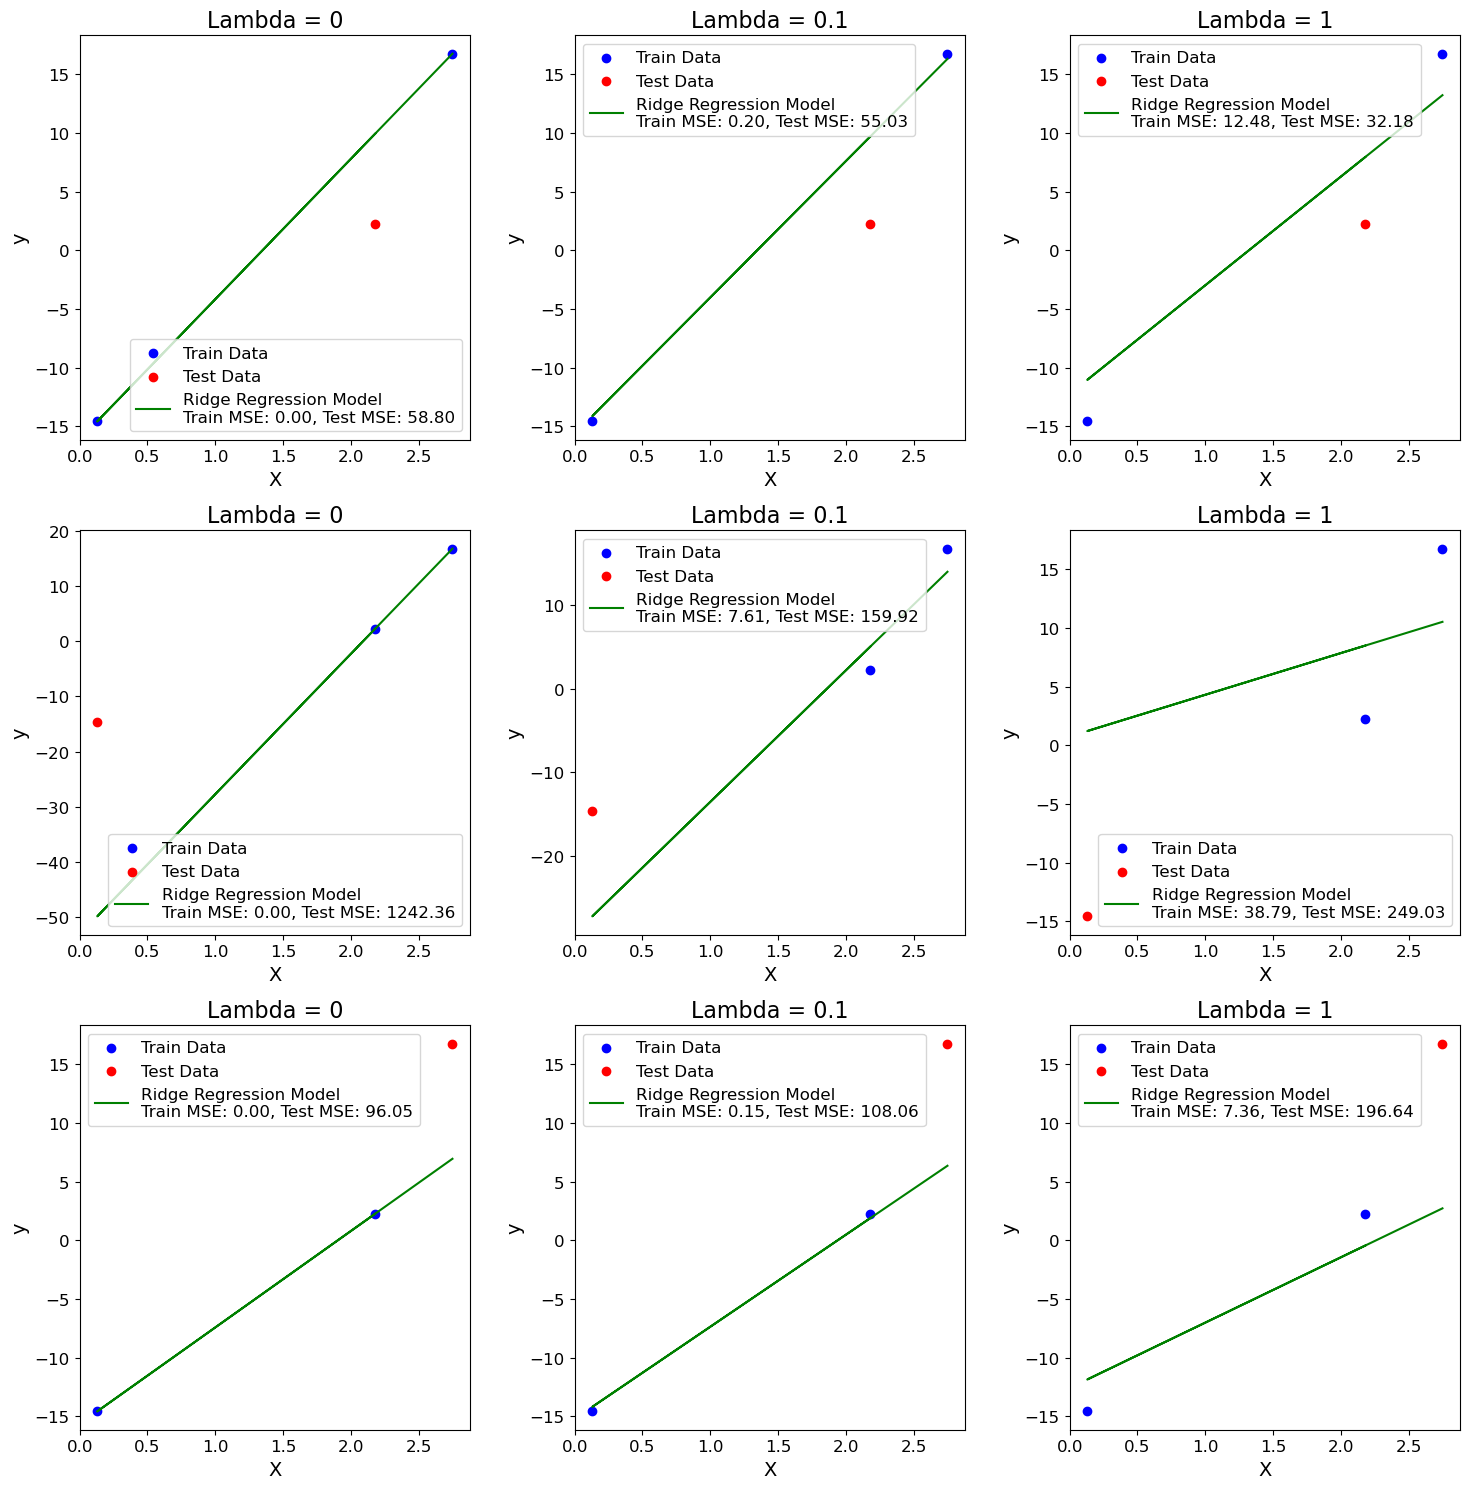

Lambda = 0: Average Train MSE = 0.00, Average Test MSE = 465.74
Lambda = 0.1: Average Train MSE = 2.65, Average Test MSE = 107.67
Lambda = 1: Average Train MSE = 19.54, Average Test MSE = 159.28


In [49]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Data points
X = np.array([[2.18], [0.13], [2.75]])
y = np.array([2.26, -14.57, 16.74])

# Define regularization parameters
alphas = [0, 0.1, 1]
n_alphas = len(alphas)

# Initialize subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
avg_test_mse = np.zeros(n_alphas)
avg_train_mse = np.zeros(n_alphas)

for i, alpha in enumerate(alphas):
    # Initialize KFold
    kf = KFold(n_splits=3, random_state=None)
    total_test_mse = 0
    total_train_mse = 0
    
    for j, (train_index, test_index) in enumerate(kf.split(X)):
        # Split data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Ridge regression model
        ridge = Ridge(alpha=alpha)
        ridge.fit(X_train, y_train)

        # Train and test MSE
        train_mse = np.mean((ridge.predict(X_train) - y_train) ** 2)
        test_mse = np.mean((ridge.predict(X_test) - y_test) ** 2)
        total_train_mse += train_mse
        total_test_mse += test_mse

        # Plotting
        ax = axs[j, i]  # switching i and j indices
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='red', label='Test Data')
        ax.plot(X, ridge.predict(X), color='green', label=f'Ridge Regression Model\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
        ax.set_title(f"Lambda = {alpha}", fontsize=16)
        ax.set_xlabel('X', fontsize=14)
        ax.set_ylabel('y', fontsize=14)
        ax.legend(fontsize=12)

        # Increase tick font size
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Compute average train and test MSE for the current lambda
    avg_train_mse[i] = total_train_mse / kf.get_n_splits()
    avg_test_mse[i] = total_test_mse / kf.get_n_splits()

plt.tight_layout()
plt.show()

# Display average train and test MSE for each lambda
for i, alpha in enumerate(alphas):
    print(f"Lambda = {alpha}: Average Train MSE = {avg_train_mse[i]:.2f}, Average Test MSE = {avg_test_mse[i]:.2f}")
